## Import SEG_SGEMM Data as int64

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_as_int64 = np.genfromtxt("./로그 데이터/SEG_SGEMM_result.txt", delimiter="\n", dtype=np.int64).reshape(-1, 1)
data_as_int64 = pd.DataFrame(data=data_as_int64, columns=["SEG"])
data_as_int64

,SEG
0,3196231680
1,93292771632
2,93293300344
3,93293373376
4,93292057424
...,...
237191,92622695528
237192,92622695520
237193,92658792872
237194,92658792864


## Import SEG_SGEMM Data as String (object)  
Since this is not regression problem, regard each of data as string, not numerics

In [3]:
original = pd.read_csv("./로그 데이터/SEG_SGEMM_result.txt")
original.columns = ["SEG"]
split_index = 20000
data = original.copy()
train_set = data[:split_index]
test_set = data[split_index:]
test_set.drop(test_set.tail(1).index, inplace=True)
train_set, test_set

(               SEG
 0      93292771632
 1      93293300344
 2      93293373376
 3      93292057424
 4      93292217584
 ...            ...
 19995  93955937600
 19996  93955937600
 19997  93955937600
 19998  93955937600
 19999  93955937600
 
 [20000 rows x 1 columns],
                 SEG
 20000   93955937600
 20001   93955937600
 20002   93955937600
 20003   93955937600
 20004   93955937600
 ...             ...
 237189  92734070262
 237190  92622695528
 237191  92622695520
 237192  92658792872
 237193  92658792864
 
 [217194 rows x 1 columns])

## Create Label and Split into Train/Test using split_index 

In [4]:
label = original.copy()
label.drop(original.head(1).index, inplace=True)
label = label.reset_index(drop=True)
train_label = label[:split_index]
test_label = label[split_index:]
train_label, test_label

(               SEG
 0      93293300344
 1      93293373376
 2      93292057424
 3      93292217584
 4      93292766680
 ...            ...
 19995  93955937600
 19996  93955937600
 19997  93955937600
 19998  93955937600
 19999  93955937600
 
 [20000 rows x 1 columns],
                 SEG
 20000   93955937600
 20001   93955937600
 20002   93955937600
 20003   93955937600
 20004   93955937600
 ...             ...
 237189  92622695528
 237190  92622695520
 237191  92658792872
 237192  92658792864
 237193  92654987192
 
 [217194 rows x 1 columns])

## Histogram of SEG using value_counts()
Since there are too many categories, unable to draw Histogram.

In [5]:
data_counts = train_label["SEG"].value_counts().to_frame("SEG_counts")
data_counts

,SEG_counts
92706114236,6686
93615631856,3739
92901442004,2391
92916149332,1469
93568880464,1163
...,...
93301663686,1
93094540080,1
92706166040,1
93262027136,1


## Number of counts over threshold  
True if number of count is greater than threshold_num_of_label, False otherwise.  
Interpretation : There are only 20 Categories that contain more than 100 data.  
Use threshold_num_of_label as Hyper-Parameter

In [6]:
threshold_num_of_label = 100
data_counts_over_threshold = (data_counts > threshold_num_of_label)["SEG_counts"]
data_counts_over_threshold.value_counts()

False    968
True      20
Name: SEG_counts, dtype: int64

## Comparision of number of counts over threshold via iterating with mod 5.

In [7]:
for i in range(1, 20):
    print((data_counts > i*5)["SEG_counts"].value_counts())

False    940
True      48
Name: SEG_counts, dtype: int64
False    958
True      30
Name: SEG_counts, dtype: int64
False    960
True      28
Name: SEG_counts, dtype: int64
False    960
True      28
Name: SEG_counts, dtype: int64
False    961
True      27
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    962
True      26
Name: SEG_counts, dtype: int64
False    963
True      25
Name: SEG_counts, dtype: int64
False    965
True      23
Name: SEG_counts, dtype: int64
False    966
True      22
Name: SEG_counts, dtype: int64
False    966
True      22
Name: SEG_counts, dtype: int64
False    967
True      21
Name: SEG_counts, dtype: int64
False    967
True      21
Name:

## Categories whose number of counts are over the threshold.

In [8]:
labels_over_threshold = data_counts_over_threshold.index[data_counts_over_threshold == True]
labels_over_threshold

Index(['92706114236', '93615631856', '92901442004', '92916149332',
       '93568880464', '93926004488', '93955937600', '92705899400',
       '93096589320', '93221812784', '93150958560', '92843445448',
       '93540914080', '93670230464', '93191793424', '79267321704',
       '93089351248', '93226732624', '93191715024', '93209484392'],
      dtype='object')

## Row indexes of data to be considered as "others"

In [9]:
train_label_mapped = train_label["SEG"].isin(labels_over_threshold)
train_label_mapped_index = train_label_mapped.index[train_label_mapped == False]
train_label_mapped_index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17163, 17164, 17165, 17166, 17167, 17168, 17169, 17299, 17300,
            17301],
           dtype='int64', length=2063)

## Represent data as "-1" (others)

In [10]:
train_label.loc[train_label_mapped_index] = "-1"
train_label["SEG"].value_counts()

92706114236    6686
93615631856    3739
92901442004    2391
-1             2063
92916149332    1469
93568880464    1163
93926004488     332
93955937600     309
92705899400     205
93096589320     174
93221812784     172
93150958560     164
92843445448     137
93540914080     134
93670230464     131
93191793424     130
79267321704     129
93089351248     127
93226732624     119
93191715024     116
93209484392     110
Name: SEG, dtype: int64

In [11]:
train_label

,SEG
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
19995,93955937600
19996,93955937600
19997,93955937600
19998,93955937600


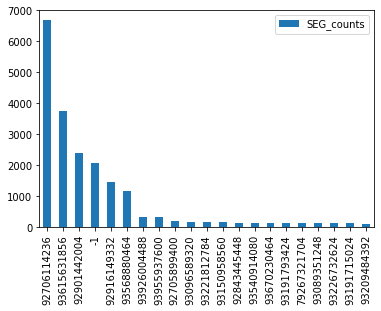

In [12]:
d = train_label["SEG"].value_counts().to_frame("SEG_counts")
d.plot(kind='bar')

In [25]:
from sklearn.preprocessing import OneHotEncoder
 
train_label_encoded, train_label_categories = train_label["SEG"].factorize()

encoder = OneHotEncoder()
encoded = encoder.fit_transform(train_label_encoded.reshape(-1, 1))
encoded.toarray().shape

(20000, 21)

In [14]:
import tensorflow as tf
from tensorflow import keras

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

    if single_step:
        labels.append(target[i+target_size])
    else:
        labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

TRAIN_SPLIT = 18000
past_history = 10
future_target = 10
STEP = 1

#x_train, y_train = multivariate_data(train_set.values, train_label.values, 0, TRAIN_SPLIT, past_history, future_target, STEP, single_step=True)
#x_val, y_val = multivariate_data(train_set.values, train_label.values, TRAIN_SPLIT, None, past_history, future_target, STEP, single_step=True)

In [15]:
x_train = train_set[:TRAIN_SPLIT].values.reshape(-1, 1, 1)
y_train = train_label[:TRAIN_SPLIT].values.reshape(-1, 1, 1)

x_val = train_set[TRAIN_SPLIT:].values.reshape(-1, 1, 1)
y_val = train_label[TRAIN_SPLIT:].values.reshape(-1, 1, 1)
x_train, y_train

(array([[['93292771632']],
 
        [['93293300344']],
 
        [['93293373376']],
 
        ...,
 
        [['92901442004']],
 
        [['92901442004']],
 
        [['92901442004']]], dtype=object),
 array([[['-1']],
 
        [['-1']],
 
        [['-1']],
 
        ...,
 
        [['92901442004']],
 
        [['92901442004']],
 
        [['92901442004']]], dtype=object))

In [16]:
BUFFER_SIZE = 100000
BATCH_SIZE = 256

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.cache().batch(BATCH_SIZE).repeat()

In [17]:
for x, y in train_data.take(1):
    print(x.shape)
    print(y.shape)
print(x_train.shape)

(256, 1, 1)
(256, 1, 1)
(18000, 1, 1)


In [18]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=(256, 1)))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy')

In [19]:
'''
EVALUATION_INTERVAL = 200
EPOCHS = 10

single_step_history = single_step_model.fit(train_data, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data,
                                            validation_steps=50)
'''

'\nEVALUATION_INTERVAL = 200\nEPOCHS = 10\n\nsingle_step_history = single_step_model.fit(train_data, epochs=EPOCHS,\n                                            steps_per_epoch=EVALUATION_INTERVAL,\n                                            validation_data=val_data,\n                                            validation_steps=50)\n'